In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
psf_file = np.genfromtxt('../matchXYZ_1604/matched_psf_xyz.dat',names=True)
flc_file = np.genfromtxt('../matchXYZ_1604/matched_flc_xyz.dat',names=True)

In [5]:
len(psf_file)

1336

In [6]:
len(flc_file)

1336

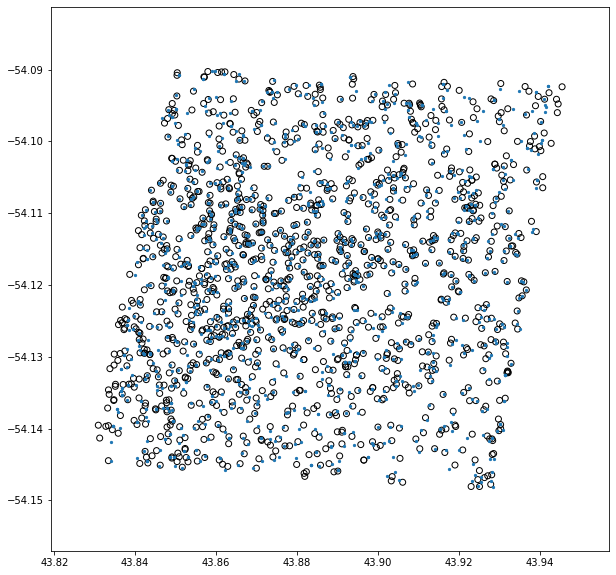

In [4]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(flc_file['RA_f606w'],flc_file['DEC_f606w'],edgecolor='black',facecolor='None')
ax.scatter(psf_file['ra'],psf_file['dec'],s=5)


plt.show()

In [2]:
# psf_file = 'matched_psfphot.dat'
# aper_file = 'matched_myphot.dat'

In [3]:
psf_full = np.genfromtxt('../elena_cats/HOROLOGIUM_CF.1.PSF.CAT',names=True)

In [ ]:
# flc_full = 

In [4]:
psf = np.genfromtxt(psf_file,names=True)
aper = np.genfromtxt(aper_file,names=True)

In [16]:
len(psf)

729

In [17]:
len(aper)

729

In [18]:
len(np.unique(aper))

518

In [19]:
len(np.unique(psf))

729

In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


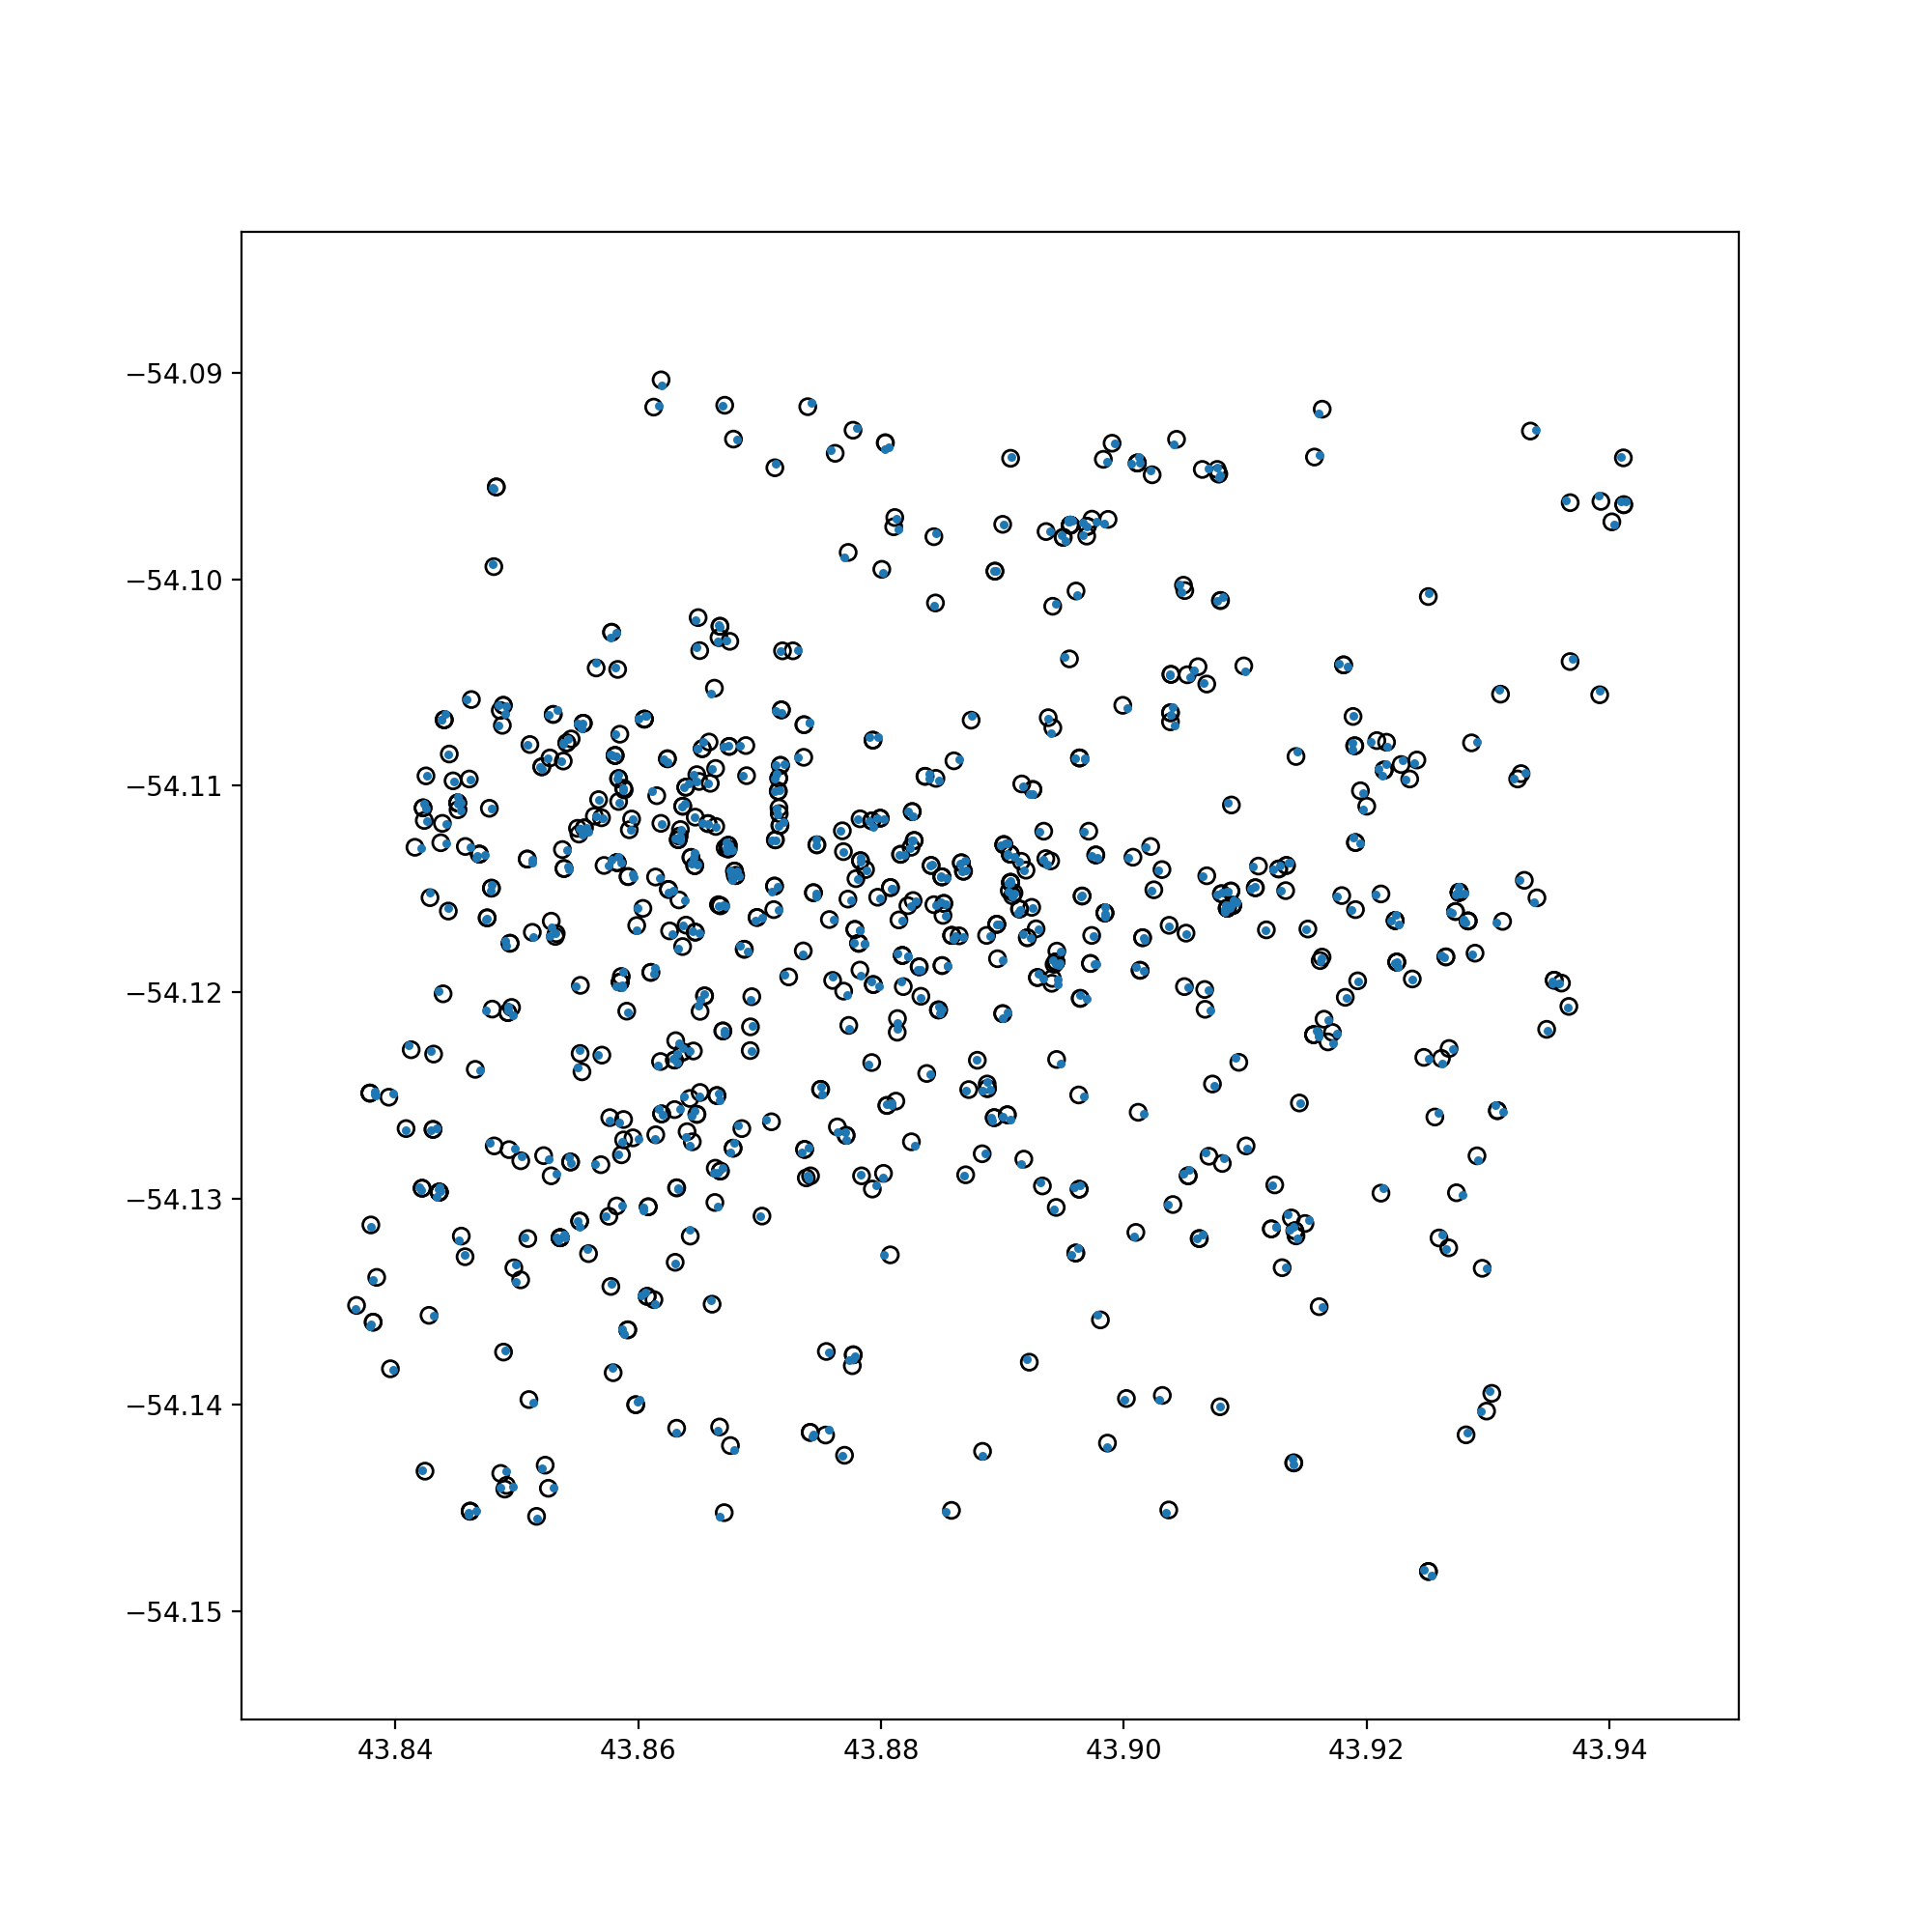

In [15]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(aper['RA_f606w'],aper['DEC_f606w'],edgecolor='black',facecolor='None')
ax.scatter(psf['ra'],psf['dec'],s=5)


plt.show()

In [5]:
a_vmag = aper['mean_f606w']
a_imag = aper['mean_f814w']

p_vmag = psf['m606c']
p_imag = psf['m814c']

In [6]:
col_a = a_vmag - a_imag
col_p = p_vmag - p_imag

col_diff = col_a - col_p

In [44]:
ckeep = np.where(col_diff!=col_diff)

ct_keep = np.logical_and(np.logical_and(col_diff<0.5,col_p>-1), \
                         np.logical_and(col_diff>-0.5,\
                            col_p<2.5))

ckeep = (ckeep, ct_keep)[1]

In [6]:
vdiff = a_vmag - p_vmag

In [34]:
idiff = a_imag - p_imag

In [51]:
keep = np.where(vdiff!=vdiff)

tmp_keep = np.logical_and(np.logical_and(vdiff<0.5,p_vmag>18), \
                np.logical_and(vdiff>-0.5,aper['stdev_f606w']<0.1))

keep = (keep,tmp_keep)[1]

In [55]:
ikeep = np.where(vdiff!=vdiff)

itmp_keep = np.logical_and(np.logical_and(idiff<0.5,p_imag>18), 
                np.logical_and(idiff>-0.5,aper['stdev_f814w']<0.1))

ikeep = (ikeep,itmp_keep)[1]

In [36]:
len(ikeep)

729

In [57]:
vmean = np.mean(vdiff[keep])

In [60]:
imean=np.mean(idiff[ikeep])

In [61]:
cmean = np.mean(col_diff[ckeep])

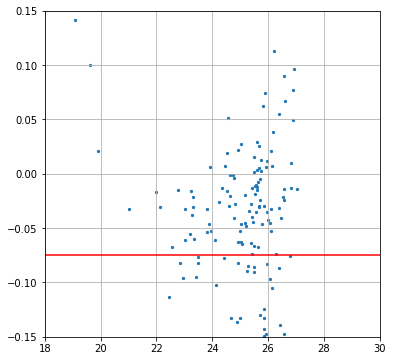

In [59]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(p_vmag[keep],vdiff[keep],s=5)
ax.grid(True)
ax.set_xlim(18,30)
ax.set_ylim(-0.15,0.15)

ax.hlines(vmean,18,30,color='red')

plt.show()

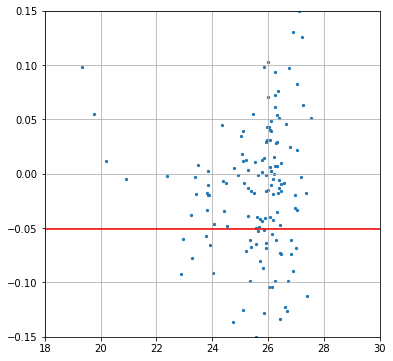

In [62]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(p_imag[ikeep],idiff[ikeep],s=5)
ax.grid(True)
ax.set_xlim(18,30)
ax.set_ylim(-0.15,0.15)

ax.hlines(imean,18,30,color='red')

plt.show()

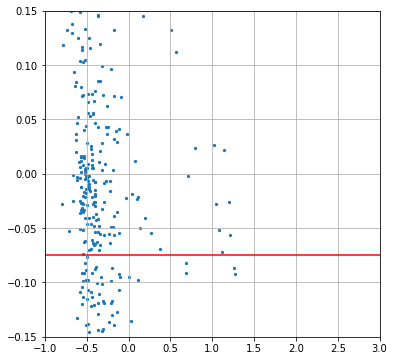

In [63]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(col_p,col_diff,s=5)
ax.grid(True)
ax.set_xlim(-1,3)
ax.set_ylim(-0.15,0.15)

ax.hlines(vmean,-1,3,color='red')

plt.show()

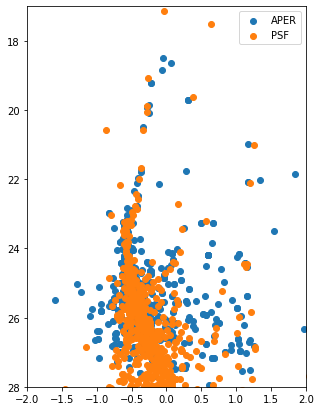

In [32]:
fig, ax = plt.subplots(figsize=(5,7))


ax.scatter(a_vmag-a_imag,a_vmag,label='APER')
ax.scatter(p_vmag-p_imag,p_vmag,label='PSF')

ax.set_xlim(-2,2)
ax.set_ylim(28,17)
ax.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.scatter(psf['r'])